### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Congruence was the independent variable that is manipulated to measure the effect on the time for participants to complete the tests where they are required to state the font color of words that had different semantic meaning. Congruence has only two values: congruence and not congruence (incongruence). 

The dependent variable was the time required for a participant to complete a test where the participant was required to correctly state the font color of words with meanings that differed from the font color. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothesis($H_0$): Congruence has no effect on the time taken for participants to state the correct font color, therefore the mean response time in the incongruent condition is equal to or not significantly different from the mean reaction time of the congruent group. 

Alternative Hypothesis($H_1$): Stimuli incongruence significantly affects the time to verbalize the correct color, therefore there is a significant difference between the mean response times in the congruent and incongruent conditions.

$$H_0 => \mu_{Incongruent} - \mu_{Congruent} = 0$$
$$H_1 => \mu_{Incongruent} - \mu_{Congruent} \neq 0$$

We would have a double-tailed alternative hypothesis instead of the upper-tailed because it would be an even more interesting finding if the participants completed the tests faster with the conflicting word meanings and font colors. It may be best practice take the point of view of a scientist in the early 1900s, having a more open mind to prevent overlooking the interesting direction of lower completion times on the incongruent tests (however unlikely). 


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import wilcoxon, ttest_rel
from scipy import stats

# Perform the analysis here
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.duplicated().sum()

0

Good to see there are no duplicates. 

In [4]:
print('Total number of participants:', len(df))
df.describe()

Total number of participants: 24


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


As shown above the average time for the 'Congruent' group is 14.051 seconds. The 'Incongruent' group had a larger average completion time of 22.016 seconds. The standard deviation of the Congruent group was 3.559 seconds and 4.797 seconds for the Incongruent group. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

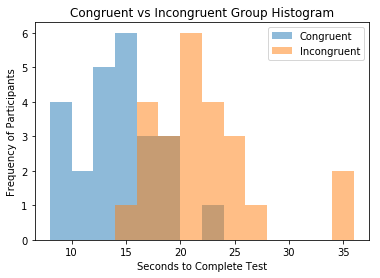

In [5]:
# Build the visualizations here
bins = np.arange(8, 38, 2)
plt.hist(df.Congruent, bins, alpha=0.5, label='Congruent')
plt.hist(df.Incongruent, bins, alpha=0.5, label='Incongruent')
plt.legend(loc='upper right')
plt.title('Congruent vs Incongruent Group Histogram')
plt.xlabel('Seconds to Complete Test')
plt.ylabel('Frequency of Participants')
plt.show()

--This double histogram shows a clear time difference between both groups.--

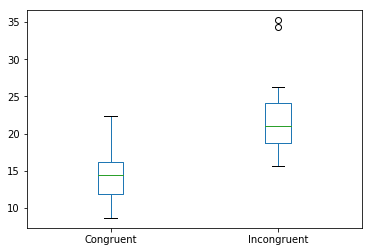

In [6]:
#based on the histogram above it appeared the Congruent ground had two outliers
#this boxplot confirms that these two are outliers. 
df[['Congruent', 'Incongruent']].plot(kind='box');

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Given that there are two outliers in the Incongruent group, and given I will keep these outliers because the sample size is only 24 people, I will perform the Wilcoxon signed-rank test in addition to the paired t-test. 

In [7]:
# Perform the statistical test here
ttest_rel(df.Incongruent, df.Congruent)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

In [8]:
#dof = degrees of freedom for 2-tail t-test
dof = len(df) - 1
dof

23

In [9]:
#t_cv = t critical value, two-tailed, degrees of freedom as 23 
t_cv = stats.t.ppf(1-0.025, 23)
t_cv

2.0686576104190406

In [11]:
wilcoxon(x=df.Incongruent, y=df.Congruent)

WilcoxonResult(statistic=0.0, pvalue=1.821529714896801e-05)

Conclusion: we can safely reject the null hypothesis: given a confidence interval of 95%, and the p-values less than .001 from both the Wilcoxon and t-test, the t-statistic well surpasses the t-critical value, and the Wilcoxon statistic is well under the Wilcoxon critical value (81 with two-tailed test, alpha=.05, N=24), therefore there is a statistically significant difference in test completion times between the congruent and incongruent tests. Specifically, the data suggests that the incongruency of word meaning and font color increases the time to state the correct font color. 


# Resources
[Wilcoxon signed-rank test: Wikipedia](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test)

[Stroop Effect; Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect#Theories)

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I buy the theory that the automaticity of word processing conditioned from years of reading causes the delay in processing the color of the words. If those colors were on something other than English words, English speakers would be able to process the color of those objects faster. There may be a neural circuit or patterned set of synapses in our brains that fire many more action potentials in less time given the stimulus of words than the stimulus of color from the greater importance of words in our social environments. 

As mentioned on Wikipedia, there is an emotional Stroop variation where participants are given emotional words such as 'grief', 'pain', and 'sorrow' with varied colors. The participants were required to state the color of the text. For the emotionally laden words, the participants who were depressed tended to take longer to state the correct font color of the emotional words. The idea here: the emotional relevance interferes with the visual relevance. 